# urllib basics

In [1]:
from urllib.request import urlopen

url = 'https://en.wikipedia.org/wiki/General-purpose_programming_language'
page = urlopen(url).read()

In [2]:
page[:50]

b'<!DOCTYPE html>\n<html class="client-nojs" lang="en'

In [3]:
page[:50].decode('utf-8')

'<!DOCTYPE html>\n<html class="client-nojs" lang="en'

In [4]:
page[-100:]

b'ion(){mw.config.set({"wgBackendResponseTime":126,"wgHostname":"mw1330"});});</script>\n</body></html>'

In [5]:
from bs4 import UnicodeDammit

In [6]:
suggestion = UnicodeDammit(page)
suggestion.original_encoding

'utf-8'

In [7]:
datafile_url = 'https://docs.misoenergy.org/marketreports/20210203_mom.xlsx'
mom_data = urlopen(datafile_url).read()
mom_data[:20]

b'PK\x03\x04\n\x00\x08\x08\x08\x00j\xa4CR\x00\x00\x00\x00\x00\x00'

In [8]:
import pandas as pd
df = pd.read_excel(mom_data)
df.head()

C:\Users\words\anaconda3\envs\datasci\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Unnamed: 0,Multiday Operating Margin Forecast Report,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,"Publish Date: February 03, 2021",NaN,NaN,NaN,NaN,NaN
1,NaN,"Market Date: February 03, 2021",NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2/4/21 HE 20**,2/5/21 HE 10**,2/6/21 HE 11,2/7/21 HE 20,2/8/21 HE 09**,2/9/21 HE 20**
4,RESOURCE COMMITTED,73143.8,70132.1,69823.7,80472.5,85188.6,82408.8


In [9]:
df = pd.read_excel(datafile_url)
df.head()

C:\Users\words\anaconda3\envs\datasci\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Unnamed: 0,Multiday Operating Margin Forecast Report,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,"Publish Date: February 03, 2021",NaN,NaN,NaN,NaN,NaN
1,NaN,"Market Date: February 03, 2021",NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2/4/21 HE 20**,2/5/21 HE 10**,2/6/21 HE 11,2/7/21 HE 20,2/8/21 HE 09**,2/9/21 HE 20**
4,RESOURCE COMMITTED,73143.8,70132.1,69823.7,80472.5,85188.6,82408.8


In [10]:
df.to_excel('mom_report.xlsx')

In [11]:
with open('mom_report.xlsx', 'wb') as f:
    f.write(mom_data)

In [12]:
from urllib.request import urlretrieve

urlretrieve(datafile_url, 'mom_report.xlsx')

df = pd.read_excel('mom_report.xlsx')
df.head()

C:\Users\words\anaconda3\envs\datasci\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Unnamed: 0,Multiday Operating Margin Forecast Report,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,"Publish Date: February 03, 2021",NaN,NaN,NaN,NaN,NaN
1,NaN,"Market Date: February 03, 2021",NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2/4/21 HE 20**,2/5/21 HE 10**,2/6/21 HE 11,2/7/21 HE 20,2/8/21 HE 09**,2/9/21 HE 20**
4,RESOURCE COMMITTED,73143.8,70132.1,69823.7,80472.5,85188.6,82408.8


## requests

In [13]:
import requests as rq

url = 'https://en.wikipedia.org/wiki/General-purpose_programming_language'
response = rq.get(url)
response.text[:50]

'<!DOCTYPE html>\n<html class="client-nojs" lang="en'

In [14]:
response.content

b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>General-purpose programming language - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"dabbe61c-c3ba-4d5f-8990-634f91aacdcd","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"General-purpose_programming_language","wgTitle":"General-purpose programming language","wgCurRevisionId":1042781005,"wgRevisionId":1042781005,"wgArticleId":891926,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Articles with long short description","Short description i

In [15]:
res = rq.get(datafile_url)
df = pd.read_excel(res.content)
df.head()

C:\Users\words\anaconda3\envs\datasci\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Unnamed: 0,Multiday Operating Margin Forecast Report,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,"Publish Date: February 03, 2021",NaN,NaN,NaN,NaN,NaN
1,NaN,"Market Date: February 03, 2021",NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2/4/21 HE 20**,2/5/21 HE 10**,2/6/21 HE 11,2/7/21 HE 20,2/8/21 HE 09**,2/9/21 HE 20**
4,RESOURCE COMMITTED,73143.8,70132.1,69823.7,80472.5,85188.6,82408.8


In [16]:
r = rq.get('https://api.github.com/events')
d = r.json()

In [17]:
len(d)

30

In [18]:
type(d[0])

dict

In [19]:
d[0].keys()

dict_keys(['id', 'type', 'actor', 'repo', 'payload', 'public', 'created_at'])

## Downloading several files

In [20]:
url = 'https://docs.misoenergy.org/marketreports/{}_mom.xlsx'

In [21]:
dates = pd.date_range(start='20191106', end='20210205')
dates = dates.strftime(date_format='%Y%m%d')
dates

Index(['20191106', '20191107', '20191108', '20191109', '20191110', '20191111',
       '20191112', '20191113', '20191114', '20191115',
       ...
       '20210127', '20210128', '20210129', '20210130', '20210131', '20210201',
       '20210202', '20210203', '20210204', '20210205'],
      dtype='object', length=458)

In [22]:
import os
from urllib.error import HTTPError

for d in dates:
    filename = f'mom_reports/{d}_mom.xlsx'
    if os.path.exists(filename):
        continue
    
    try:
        urlretrieve(url.format(d), filename)
    except HTTPError:
        continue

In [23]:
from glob import glob
excel_files = glob('mom_reports/*.xlsx')

In [24]:
from xlrd import XLRDError

def extract_miso_forecasts(path):
    """
    Takes a filepath to .xlsx MISO MOM reports and extracts wind and load forecasts.
    Saves data to an Excel file - miso_forecasts.xlsx, and returns the DataFrame.
    """
    excel_files = glob(os.path.join(path, '*.xlsx'))
    full_forecast_df = None
    for file in excel_files:
        try:
            df = pd.read_excel(file, sheet_name='MISO', skiprows=4, nrows=17, index_col=0, usecols=range(7))
        except (XLRDError, ValueError):
            df = pd.read_excel(file, sheet_name='MOM Report', skiprows=4, nrows=17, index_col=0, usecols=range(7))
        
        # get data
        loads = df.loc['Projected Load', :].to_list()
        wind = df.loc['Renewable Forecast', :].to_list()
        
        # make column labels
        load_labels = [f'load_d{d}' for d in range(1, 7)]
        wind_labels = [f'wind_d{d}' for d in range(1, 7)]
        
        # create and append dataframe
        data_dict = {col: val for col, val in zip(load_labels + wind_labels, loads + wind)}
        date = pd.to_datetime(file.split('\\')[-1].split('_')[0])
        forecast_df = pd.DataFrame.from_records(data=data_dict, index=[date])
        if full_forecast_df is None:
            full_forecast_df = forecast_df.copy()
        else:
            full_forecast_df = full_forecast_df.append(forecast_df)
    
    full_forecast_df.sort_index(inplace=True)
    full_forecast_df.to_excel('miso_forecasts.xlsx')
    return full_forecast_df

In [25]:
df = extract_miso_forecasts('mom_reports')

C:\Users\words\anaconda3\envs\datasci\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [26]:
plot_df = pd.concat([df['wind_d1'], df['wind_d2'].shift(), df['wind_d3'].shift(2)], axis=1)
plot_df.index += pd.DateOffset(1)

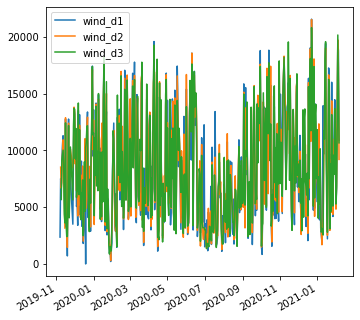

In [27]:
import matplotlib.pyplot as plt
# uncommenting the next line makes the plot interactive
#%matplotlib widget

f = plt.figure(figsize=(5.5, 5.5))
f.patch.set_facecolor('w')  # sets background color behind axis labels
plot_df.plot(ax=plt.gca())

In [28]:
(plot_df['wind_d2'] - plot_df['wind_d1']).abs().mean() / plot_df['wind_d1'].mean()

0.1283370478815929

In [29]:
((plot_df['wind_d2'] - plot_df['wind_d1']) / plot_df['wind_d1']).abs().mean()

inf

## Parsing HTML from scraped pages

urllib and requests don't work with JavaScript, use requests-html, Scrapy with scrapy-splash, or Selenium (there are probably other options too).

In [30]:
res = rq.get('https://www.packtpub.com/')
with open('packt.html', 'wb') as f:
    f.write(res.content)

In [31]:
url = 'https://en.wikipedia.org/wiki/General-purpose_programming_language'
wiki_text = urlopen(url).read().decode('utf-8')

In [32]:
wiki_text[:50]

'<!DOCTYPE html>\n<html class="client-nojs" lang="en'

In [33]:
from bs4 import BeautifulSoup as bs
import lxml

In [34]:
soup = bs(wiki_text)

In [35]:
links = soup.find_all('a')
links[102]

<a href="/wiki/Programming_language" title="Programming language">programming-language</a>

This index will likely change over time. You can find the current index for the programming-language link by searching the output below:

In [36]:
list(enumerate(links))

[(0, <a id="top"></a>),
 (1, <a class="mw-jump-link" href="#mw-head">Jump to navigation</a>),
 (2, <a class="mw-jump-link" href="#searchInput">Jump to search</a>),
 (3,
  <a class="image" href="/wiki/File:Question_book-new.svg"><img alt="Question book-new.svg" data-file-height="399" data-file-width="512" decoding="async" height="39" src="//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/50px-Question_book-new.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/75px-Question_book-new.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/100px-Question_book-new.svg.png 2x" width="50"/></a>),
 (4,
  <a href="/wiki/Wikipedia:Articles_with_a_single_source" title="Wikipedia:Articles with a single source">single source</a>),
 (5,
  <a href="/wiki/Talk:General-purpose_programming_language##" title="Talk:General-purpose programming language">talk page</a>),
 (6,
  <a class="external text" href="https://en.wikipedi

In [37]:
soup.find_all('a', {'title': 'Programming language'})

[<a href="/wiki/Programming_language" title="Programming language">programming language</a>,
 <a href="/wiki/Programming_language" title="Programming language">programming-language</a>]

In [38]:
soup.find_all('a', text='Python')

[<a href="/wiki/Python_(programming_language)" title="Python (programming language)">Python</a>]

In [39]:
import re

soup.find_all('a', text=re.compile('.*programming.*'))

[<a class="external text" href="//www.google.com/search?as_eq=wikipedia&amp;q=%22General-purpose+programming+language%22" rel="nofollow">"General-purpose programming language"</a>,
 <a href="/wiki/Programming_language" title="Programming language">programming language</a>,
 <a href="/wiki/Systems_programming" title="Systems programming">Systems programming</a>,
 <a class="mw-redirect" href="/wiki/Domain-specific_programming_language" title="Domain-specific programming language">domain-specific programming language</a>,
 <a href="/wiki/Programming_language" title="Programming language">programming-language</a>,
 <a dir="ltr" href="https://en.wikipedia.org/w/index.php?title=General-purpose_programming_language&amp;oldid=1042781005">https://en.wikipedia.org/w/index.php?title=General-purpose_programming_language&amp;oldid=1042781005</a>]

In [40]:
import lxml.html

tree = lxml.html.fromstring(wiki_text)
link_div = tree.xpath('//*[@id="mw-content-text"]/div[1]/div[3]')

In [41]:
tree.xpath('/*')[0].tag

'html'

In [42]:
# gets all elements in the document
tree.xpath('//*')[:5]

[<Element html at 0x22d1e8a6680>,
 <Element head at 0x22d1e8d7e00>,
 <Element meta at 0x22d1e8d7d60>,
 <Element title at 0x22d1e8d7ea0>,
 <Element script at 0x22d1e8d7e50>]

In [43]:
wiki_url = 'https://wikipedia.org'

link_elements = tree.xpath('//*[@id="mw-content-text"]/div[1]/div[3]//a')
links = [wiki_url + link.attrib['href'] for link in link_elements]
links[:5]

['https://wikipedia.org/wiki/C_(programming_language)',
 'https://wikipedia.org/wiki/C%2B%2B',
 'https://wikipedia.org/wiki/C_Sharp_(programming_language)',
 'https://wikipedia.org/wiki/Clojure',
 'https://wikipedia.org/wiki/Crystal_(programming_language)']

#### Other methods for extracting the list of links
We could also specify the full child path - a ul element inside the div, and li elements in the ul.

In [44]:
link_elements = tree.xpath('//*[@id="mw-content-text"]/div[1]/div[2]/ul/li/a')
links = [wiki_url + link.attrib['href'] for link in link_elements]
links[:5]

['https://wikipedia.org#History',
 'https://wikipedia.org#Definitions',
 'https://wikipedia.org#List',
 'https://wikipedia.org#Notes',
 'https://wikipedia.org#See_also']

We can loop through the li elements within the div and get the href attributes using the `find` method too. Note we have to find each child element one at a time (e.g. we find the ul element, then the li, then the a elements).

In [45]:
links = [el.find('a').attrib['href'] for el in link_div[0].find('ul').findall('li')]
links[:5]

['/wiki/C_(programming_language)',
 '/wiki/C%2B%2B',
 '/wiki/C_Sharp_(programming_language)',
 '/wiki/Clojure',
 '/wiki/Crystal_(programming_language)']

We can also search the entire lxml object by prefixing our tag with `.//` (basically using XPath notation again), instead of stepping down the tree one child node at a time:

In [46]:
links = [el.attrib['href'] for el in link_div[0].findall('.//a')]
links[:5]

['/wiki/C_(programming_language)',
 '/wiki/C%2B%2B',
 '/wiki/C_Sharp_(programming_language)',
 '/wiki/Clojure',
 '/wiki/Crystal_(programming_language)']

Last, we could convert the resulting element from our original XPath search into a bs4 object, and search it that way:

In [47]:
div_soup = bs(lxml.etree.tostring(link_div[0]).decode('utf-8'))
links = [a.attrs['href'] for a in div_soup.find_all('a')]
links[:5]

['/wiki/C_(programming_language)',
 '/wiki/C%2B%2B',
 '/wiki/C_Sharp_(programming_language)',
 '/wiki/Clojure',
 '/wiki/Crystal_(programming_language)']

#### Using bs4 to find the links

In [48]:
language_link_elements = soup.find_all('ul')[1].find_all('a')
language_links = [wiki_url + link.attrs['href'] for link in language_link_elements]
language_links[:5]

['https://wikipedia.org/wiki/C_(programming_language)',
 'https://wikipedia.org/wiki/C%2B%2B',
 'https://wikipedia.org/wiki/C_Sharp_(programming_language)',
 'https://wikipedia.org/wiki/Clojure',
 'https://wikipedia.org/wiki/Crystal_(programming_language)']

In [49]:
import numpy as np

index = np.where(['C++' in u.text for u in soup.find_all('ul')])[0][0]
index

1

### Collecting data from several pages

In [50]:
all_text = []
for link in language_links:
    html = rq.get(link).text
    soup = bs(html)
    paragraph_text = soup.find_all('p')
    all_text.extend([p.text for p in paragraph_text])
    
text = ' '.join(all_text)

In [51]:
text[:100]

'\n C (/ˈsiː/, as in the letter c) is a general-purpose, procedural computer programming language supp'

In [52]:
import string

from nltk import FreqDist, bigrams
from nltk.corpus import stopwords

en_stopwords = set(stopwords.words('english'))
# if we get text from the entire page, these stopwords are helpful
wiki_stops = set(['wikipedia', 'encyclopedia', 'free', 'jump', 'navigation', 'retrieved', 'programming', 'language', 'code'])
full_stops = en_stopwords | wiki_stops

translator = str.maketrans('', '', string.punctuation + string.digits)
cleaned_text = text.translate(translator)

cleaned_words = [w for w in cleaned_text.lower().split() if w not in en_stopwords and len(w) > 3]

In [53]:
unigram_freq = FreqDist(cleaned_words)

In [54]:
unigram_freq.most_common(20)

[('language', 715),
 ('code', 449),
 ('programming', 408),
 ('used', 395),
 ('type', 362),
 ('also', 323),
 ('java', 320),
 ('perl', 305),
 ('class', 279),
 ('system', 253),
 ('compiler', 235),
 ('languages', 234),
 ('function', 234),
 ('using', 232),
 ('features', 231),
 ('support', 227),
 ('standard', 225),
 ('types', 209),
 ('object', 207),
 ('functions', 194)]

In [55]:
bg = [' '.join(bigr) for bigr in bigrams(cleaned_words)]
bg_fd = FreqDist(bg)
list(bg)

['ˈsiː letter',
 'letter generalpurpose',
 'generalpurpose procedural',
 'procedural computer',
 'computer programming',
 'programming language',
 'language supporting',
 'supporting structured',
 'structured programming',
 'programming lexical',
 'lexical variable',
 'variable scope',
 'scope recursion',
 'recursion static',
 'static type',
 'type system',
 'system design',
 'design provides',
 'provides constructs',
 'constructs efficiently',
 'efficiently typical',
 'typical machine',
 'machine instructions',
 'instructions found',
 'found lasting',
 'lasting applications',
 'applications previously',
 'previously coded',
 'coded assembly',
 'assembly language',
 'language applications',
 'applications include',
 'include operating',
 'operating systems',
 'systems various',
 'various application',
 'application software',
 'software computer',
 'computer architectures',
 'architectures range',
 'range supercomputers',
 'supercomputers plcs',
 'plcs embedded',
 'embedded systems',
 

In [56]:
bg_fd.most_common(20)

[('programming language', 129),
 ('visual basic', 57),
 ('programming languages', 53),
 ('standard library', 53),
 ('operating system', 43),
 ('source code', 43),
 ('functional programming', 37),
 ('type system', 36),
 ('hello world', 35),
 ('objectoriented programming', 35),
 ('virtual machine', 32),
 ('operating systems', 31),
 ('garbage collection', 31),
 ('compile time', 31),
 ('scripting language', 28),
 ('data structures', 27),
 ('open source', 26),
 ('language features', 25),
 ('data types', 25),
 ('base class', 22)]

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

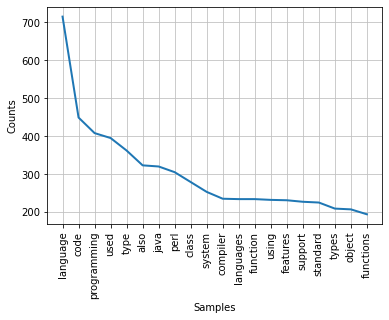

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [58]:
unigram_freq.plot(20)

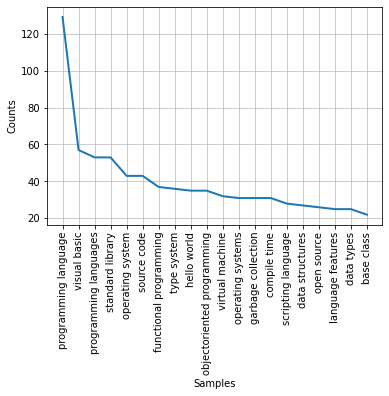

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [59]:
bg_fd.plot(20)

# Using APIs to collect data

In [60]:
url = 'https://api.misoenergy.org/MISORTWDDataBroker/DataBrokerServices.asmx?messageType=getWindForecast&returnType=json'
res = rq.get(url)
res.json()['Forecast'][0]

{'DateTimeEST': '2021-09-19 12:00:00 AM',
 'HourEndingEST': '1',
 'Value': '16300.00'}

In [61]:
res.json().keys()

dict_keys(['MktDay', 'RefId', 'Forecast'])

In [62]:
df = pd.json_normalize(res.json()['Forecast'])
df.head()

,DateTimeEST,HourEndingEST,Value
0,2021-09-19 12:00:00 AM,1,16300.00
1,2021-09-19 1:00:00 AM,2,16199.00
2,2021-09-19 2:00:00 AM,3,15973.00
3,2021-09-19 3:00:00 AM,4,15634.00
4,2021-09-19 4:00:00 AM,5,15345.00


In [63]:
res.json()['Forecast']

[{'DateTimeEST': '2021-09-19 12:00:00 AM',
  'HourEndingEST': '1',
  'Value': '16300.00'},
 {'DateTimeEST': '2021-09-19 1:00:00 AM',
  'HourEndingEST': '2',
  'Value': '16199.00'},
 {'DateTimeEST': '2021-09-19 2:00:00 AM',
  'HourEndingEST': '3',
  'Value': '15973.00'},
 {'DateTimeEST': '2021-09-19 3:00:00 AM',
  'HourEndingEST': '4',
  'Value': '15634.00'},
 {'DateTimeEST': '2021-09-19 4:00:00 AM',
  'HourEndingEST': '5',
  'Value': '15345.00'},
 {'DateTimeEST': '2021-09-19 5:00:00 AM',
  'HourEndingEST': '6',
  'Value': '15248.00'},
 {'DateTimeEST': '2021-09-19 6:00:00 AM',
  'HourEndingEST': '7',
  'Value': '15313.00'},
 {'DateTimeEST': '2021-09-19 7:00:00 AM',
  'HourEndingEST': '8',
  'Value': '15230.00'},
 {'DateTimeEST': '2021-09-19 8:00:00 AM',
  'HourEndingEST': '9',
  'Value': '14000.00'},
 {'DateTimeEST': '2021-09-19 9:00:00 AM',
  'HourEndingEST': '10',
  'Value': '13127.00'},
 {'DateTimeEST': '2021-09-19 10:00:00 AM',
  'HourEndingEST': '11',
  'Value': '13704.00'},
 {'Dat

In [64]:
res.json()['MktDay']

'09-19-2021'

In [65]:
df.to_excel('miso_wind_forecast_{}.xlsx'.format(res.json()['MktDay']))

## Using API wrappers
### Using PRAW

This has been rerun since the first draft of the book, so the results differ a little bit.

In [66]:
import praw

reddit = praw.Reddit(
    client_id="8MB3NbLPbbHxgHSLCQR5Dw",
    client_secret="-tQdj_O7hPWhMkfgcAcBYotvWd1-KQ",
    user_agent="test"
)

Version 7.0.0 of praw is outdated. Version 7.4.0 was released Friday July 30, 2021.


In [67]:
post_text_list = []
comment_text_list = []
for post in reddit.subreddit("california").hot(limit=100):
    post_text_list.append(post.selftext)
    # removes 'show more comments' instances
    post.comments.replace_more(limit=0)
    comments = post.comments.list()
    for c in comments:
        comment_text_list.append(c.body)

all_text = ' '.join(post_text_list + comment_text_list)

In [68]:
len(comment_text_list)

7013

In [69]:
translator = str.maketrans('', '', string.punctuation + string.digits)
cleaned_text = all_text.translate(translator)

reddit_stopwords = set(['removed', 'dont']) | en_stopwords
cleaned_words = [w for w in cleaned_text.lower().split() if w not in reddit_stopwords and len(w) > 3]

In [70]:
bg = [' '.join(bigr) for bigr in bigrams(cleaned_words)]
bg_fd = FreqDist(bg)
bg_fd.most_common(10)

[('climate change', 81),
 ('minimum wage', 79),
 ('single family', 64),
 ('many people', 55),
 ('uber lyft', 46),
 ('property taxes', 44),
 ('seems like', 41),
 ('larry elder', 40),
 ('last year', 40),
 ('central valley', 36)]

In [71]:
"don't" in en_stopwords

True

In [72]:
rq.utils.default_headers()

{'User-Agent': 'python-requests/2.26.0', 'Accept-Encoding': 'gzip, deflate, br', 'Accept': '*/*', 'Connection': 'keep-alive'}